# libraries

In [2]:
import pandas as pd
import numpy as np
import os
import re
from nltk.corpus import stopwords
import nltk
# import spacy
# import en_core_web_lg
# import time

# utilities
# from pprint import pprint as pp

# data analysis/management/manipulation
# import sklearn

# load data

In [3]:
## Read in the scraped data
CWD=os.getcwd()
FOLDER='New Twitter data'
FILE1='Electric_data.csv'
FILE2='Hybrid_data.csv'

# data cleaning

## EV

In [ ]:
EV = pd.read_csv(os.path.join(CWD,FOLDER,FILE1))

In [6]:
ev=EV.drop(['user_id','id', 'conversation_id', 'created_at','time', 'timezone','name', 'place','mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],axis=1)

In [25]:
print(ev.groupby('date').groups)

{'2015-01-02': Int64Index([90784], dtype='int64'), '2015-01-03': Int64Index([90781, 90782, 90783], dtype='int64'), '2015-01-04': Int64Index([90779, 90780], dtype='int64'), '2015-01-05': Int64Index([90777, 90778], dtype='int64'), '2015-01-06': Int64Index([90774, 90775, 90776], dtype='int64'), '2015-01-09': Int64Index([90773], dtype='int64'), '2015-01-11': Int64Index([90772], dtype='int64'), '2015-01-12': Int64Index([90770, 90771], dtype='int64'), '2015-01-13': Int64Index([90764, 90765, 90766, 90767, 90768, 90769], dtype='int64'), '2015-01-14': Int64Index([90763], dtype='int64'), '2015-01-15': Int64Index([90718, 90719, 90760, 90761, 90762], dtype='int64'), '2015-01-16': Int64Index([90717], dtype='int64'), '2015-01-17': Int64Index([90715, 90716], dtype='int64'), '2015-01-19': Int64Index([90711, 90712, 90713, 90714], dtype='int64'), '2015-01-20': Int64Index([90710], dtype='int64'), '2015-01-21': Int64Index([90709], dtype='int64'), '2015-01-24': Int64Index([90706, 90707, 90708], dtype='int6

In [32]:
ev.drop(index=[78488,32768, 49152],inplace=True)

In [34]:
evyear=[i.split('-')[0] for i in ev.date.values.tolist()]
set(evyear)

{'2015', '2016', '2017', '2018', '2019'}

In [37]:
ev['tweet'].isnull().count() == len(ev['tweet'])

True

In [38]:
# drop duplicate
ev.drop_duplicates(subset=None, keep='first',inplace=True)

In [39]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64514 entries, 0 to 91802
Data columns (total 3 columns):
date        64514 non-null object
username    64514 non-null object
tweet       64514 non-null object
dtypes: object(3)
memory usage: 2.0+ MB


In [47]:
ev.drop_duplicates(subset=['tweet'], keep='first',inplace=True)

In [48]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55555 entries, 0 to 55554
Data columns (total 6 columns):
index       55555 non-null int64
date        55555 non-null object
username    55555 non-null object
tweet       55555 non-null object
label       55555 non-null object
year        55555 non-null object
dtypes: int64(1), object(5)
memory usage: 3.0+ MB


In [42]:
# add labels 0 for ev , 1 for hybrid
ev['label']='Electric'

# add year
ev['year']=[i.split('-')[0] for i in ev.date.values]

In [43]:
ev.reset_index(inplace=True)

In [44]:
ev

,index,date,username,tweet,label,year
0,0,2015-12-30,tech_muff,#MyFord #Mobile Is a #SmartWatch #App Perfect ...,Electric,2015
1,1,2015-12-30,solarknowledge,#solar Exclusive Video On GM’s Electric Vehicl...,Electric,2015
2,2,2015-12-30,worldreachcomms,@harbourtimes Hong Kong announcement - 2016 wo...,Electric,2015
3,3,2015-12-30,hessolar,"Exclusive Video On GM’s Electric Vehicle Path,...",Electric,2015
4,4,2015-12-30,hessolar,"Exclusive Video On GM’s Electric Vehicle Path,...",Electric,2015
...,...,...,...,...,...,...
55550,91797,2019-12-26,stefan_howard,Why German Beemers? Normal versions are bloody...,Electric,2019
55551,91799,2019-12-26,damienscully,2022 FIFA World Cup will feature self-driving ...,Electric,2019
55552,91800,2019-12-26,andyc_88,Haha compared to an electric car that gets out...,Electric,2019
55553,91801,2019-12-26,femzy54,I checked your account you have retweeted a Fo...,Electric,2019


In [46]:
ev.groupby(['year'], as_index=False)['index'].count()

,year,index
0,2015,7167
1,2016,13914
2,2017,7011
3,2018,7262
4,2019,20201


In [137]:
ev=ev.drop(['index','date','username'],axis=1)

In [138]:
ev.to_csv(os.path.join(CWD,FOLDER,'EV_Cleaned.csv'))

## Hybrid

In [4]:
HY = pd.read_csv(os.path.join(CWD,FOLDER,FILE2))

D:\Python\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,7,8,9,10,11,12,13,17,18,19,20,21,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
hy=HY.drop(['user_id','id', 'conversation_id', 'created_at','time', 'timezone','name', 'place','mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],axis=1)

In [11]:
hy.drop(index=[98304,105263,3917, 8252, 16384, 65536, 81920, 82044, 82249, 82251],inplace=True)

In [ ]:
hy.drop(index=[49152],inplace=True)

In [66]:
hy.drop(index=[3916],inplace=True)

In [27]:
# drop duplicate
hy.drop_duplicates(subset=None, keep='first',inplace=True)

In [30]:
hy.drop_duplicates(subset=['tweet'], keep='first',inplace=True)

In [67]:
hy.dropna(subset=['tweet'],inplace=True)

In [121]:
# add labels 0 for ev , 1 for hybrid
hy['label']='Hybrid'

# add year
hy['year']=[i.split('-')[0] for i in hy.date.values]

In [122]:
hy.head()

,date,username,tweet,label,year
0,2019-12-31,wpgpuckstar,In 2019 I made the choice to go with a hybrid ...,Hybrid,2019
1,2019-12-31,divergent_india,Can Hybrid Vehicles Make A Difference As India...,Hybrid,2019
2,2019-12-31,griffik2,Why won't give more help in buying either a el...,Hybrid,2019
3,2019-12-31,revolutionau,NSW Electric and Hybrid Vehicle Plan\n https:/...,Hybrid,2019
4,2019-12-30,mariamadryak,"Dear @WisconsinDMV, \n\nWhy in the 🌏 would you...",Hybrid,2019


In [123]:
hy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37710 entries, 0 to 113630
Data columns (total 5 columns):
date        37710 non-null object
username    37710 non-null object
tweet       37710 non-null object
label       37710 non-null object
year        37710 non-null object
dtypes: object(5)
memory usage: 3.0+ MB


## hybridcar2

In [85]:
HY1 = pd.read_csv(os.path.join(CWD,FOLDER,'HybridCar2.csv'))

In [87]:
hy1=HY1.drop(['user_id','id', 'conversation_id', 'created_at','time', 'timezone','name', 'place','mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],axis=1)

In [91]:
# drop duplicate
hy1.drop_duplicates(subset=None, keep='first',inplace=True)
hy1.drop_duplicates(subset=['tweet'], keep='first',inplace=True)
hy1.dropna(subset=['tweet'],inplace=True)

In [89]:
# add labels 0 for ev , 1 for hybrid
hy1['label']='Hybrid'

# add year
hy1['year']=[i.split('-')[0] for i in hy1.date.values]

In [92]:
hy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5406 entries, 0 to 6160
Data columns (total 5 columns):
date        5406 non-null object
username    5406 non-null object
tweet       5406 non-null object
label       5406 non-null object
year        5406 non-null object
dtypes: object(5)
memory usage: 253.4+ KB


In [96]:
HY2 = pd.read_csv(os.path.join(CWD,FOLDER,'HybridCar1.csv'))

In [97]:
hy2=HY2.drop(['user_id','id', 'conversation_id', 'created_at','time', 'timezone','name', 'place','mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],axis=1)

In [98]:
# drop duplicate
hy2.drop_duplicates(subset=None, keep='first',inplace=True)
hy2.drop_duplicates(subset=['tweet'], keep='first',inplace=True)
hy2.dropna(subset=['tweet'],inplace=True)

In [99]:
# add labels 0 for ev , 1 for hybrid
hy2['label']='Hybrid'

# add year
hy2['year']=[i.split('-')[0] for i in hy2.date.values]

In [101]:
HY3 = pd.read_csv(os.path.join(CWD,FOLDER,'HybridVehicle.csv'))

In [102]:
hy3=HY3.drop(['user_id','id', 'conversation_id', 'created_at','time', 'timezone','name', 'place','mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],axis=1)

In [103]:
# drop duplicate
hy3.drop_duplicates(subset=None, keep='first',inplace=True)
hy3.drop_duplicates(subset=['tweet'], keep='first',inplace=True)
hy3.dropna(subset=['tweet'],inplace=True)

In [104]:
# add labels 0 for ev , 1 for hybrid
hy3['label']='Hybrid'

# add year
hy3['year']=[i.split('-')[0] for i in hy3.date.values]

In [124]:
hy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5406 entries, 0 to 6160
Data columns (total 5 columns):
date        5406 non-null object
username    5406 non-null object
tweet       5406 non-null object
label       5406 non-null object
year        5406 non-null object
dtypes: object(5)
memory usage: 253.4+ KB


In [125]:
hy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 46
Data columns (total 5 columns):
date        46 non-null object
username    46 non-null object
tweet       46 non-null object
label       46 non-null object
year        46 non-null object
dtypes: object(5)
memory usage: 2.2+ KB


In [126]:
hy3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 0 to 1930
Data columns (total 5 columns):
date        1634 non-null object
username    1634 non-null object
tweet       1634 non-null object
label       1634 non-null object
year        1634 non-null object
dtypes: object(5)
memory usage: 76.6+ KB


## concat

In [127]:
hyframes = [hy, hy1, hy2, hy3]
hy = pd.concat(hyframes)

In [128]:
hy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44796 entries, 0 to 1930
Data columns (total 5 columns):
date        44796 non-null object
username    44796 non-null object
tweet       44796 non-null object
label       44796 non-null object
year        44796 non-null object
dtypes: object(5)
memory usage: 2.1+ MB


In [179]:
# drop duplicate
hy.drop_duplicates(subset=None, keep='first',inplace=True)
hy.drop_duplicates(subset=['tweet'], keep='first',inplace=True)
hy.dropna(subset=['tweet'],inplace=True)

In [ ]:
hy.info()

In [132]:
hy.reset_index(inplace=True)

In [145]:
hy.groupby(['year'], as_index=False)['tweet'].count()

,year,tweet
0,2015,10103
1,2016,9415
2,2017,7156
3,2018,8894
4,2019,9129


In [140]:
ev.groupby(['year'], as_index=False)['tweet'].count()

,year,tweet
0,2015,7167
1,2016,13914
2,2017,7011
3,2018,7262
4,2019,20201


In [135]:
hy=hy.drop(['index','date','username'],axis=1)

In [143]:
hy.to_csv(os.path.join(CWD,FOLDER,'HY_Cleaned.csv'))

# overall

In [148]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55555 entries, 0 to 55554
Data columns (total 4 columns):
Unnamed: 0    55555 non-null int64
tweet         55555 non-null object
label         55555 non-null object
year          55555 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


In [146]:
hy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44697 entries, 0 to 44696
Data columns (total 3 columns):
tweet    44697 non-null object
label    44697 non-null object
year     44697 non-null object
dtypes: object(3)
memory usage: 1.0+ MB


In [156]:
ev.columns

Index(['Unnamed: 0', 'tweet', 'label', 'year'], dtype='object')

In [157]:
ev=ev.drop(['Unnamed: 0'],axis=1)

In [158]:
#concat
allframes=[ev, hy]
df = pd.concat(allframes)

In [159]:
df

,tweet,label,year
0,#MyFord #Mobile Is a #SmartWatch #App Perfect ...,Electric,2015
1,#solar Exclusive Video On GM’s Electric Vehicl...,Electric,2015
2,@harbourtimes Hong Kong announcement - 2016 wo...,Electric,2015
3,"Exclusive Video On GM’s Electric Vehicle Path,...",Electric,2015
4,"Exclusive Video On GM’s Electric Vehicle Path,...",Electric,2015
...,...,...,...
44692,Projected $40/Barrel Oil in 2015. How are elec...,Hybrid,2015
44693,Toyota's most affordable hybrid vehicle is als...,Hybrid,2015
44694,Toyota's most affordable hybrid vehicle is als...,Hybrid,2015
44695,"To kick off 2015, we're looking at all the new...",Hybrid,2015


In [161]:
df.reset_index(inplace=True)

In [162]:
df=df.drop(['index'],axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100252 entries, 0 to 100251
Data columns (total 3 columns):
tweet    100252 non-null object
label    100252 non-null object
year     100252 non-null object
dtypes: object(3)
memory usage: 2.3+ MB


In [165]:
df.to_csv(os.path.join(CWD,FOLDER,'Twitter_Cleaned.csv'))

In [3]:
## Read in the scraped data
CWD=os.getcwd()
FOLDER='New Twitter data'
df= pd.read_csv(os.path.join(CWD,FOLDER,'Twitter_Cleaned.csv'))

In [4]:
df= pd.read_csv(os.path.join(CWD,FOLDER,'Twitter_Cleaned.csv'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100252 entries, 0 to 100251
Data columns (total 4 columns):
Unnamed: 0    100252 non-null int64
tweet         100252 non-null object
label         100252 non-null object
year          100252 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [8]:
df['original']= df['tweet']

In [10]:
df= df.drop(['Unnamed: 0'],axis=1)

In [11]:
df

,tweet,label,year,original
0,#MyFord #Mobile Is a #SmartWatch #App Perfect ...,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,#solar Exclusive Video On GM’s Electric Vehicl...,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...
2,@harbourtimes Hong Kong announcement - 2016 wo...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...
3,"Exclusive Video On GM’s Electric Vehicle Path,...",Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
4,"Exclusive Video On GM’s Electric Vehicle Path,...",Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
...,...,...,...,...
100247,Projected $40/Barrel Oil in 2015. How are elec...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...
100248,Toyota's most affordable hybrid vehicle is als...,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100249,Toyota's most affordable hybrid vehicle is als...,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100250,"To kick off 2015, we're looking at all the new...",Hybrid,2015,"To kick off 2015, we're looking at all the new..."


# data preprocessing

In [12]:
# remove hashtag and username
df.loc[:, 'tweet'] = df['tweet'].str.replace('#[^\s]+', '')
df.loc[:, 'tweet'] = df['tweet'].str.replace('@[^\s]+', '')

In [13]:
# remove returns
df.loc[:, 'tweet'] = df['tweet'].str.replace('\n', '')

In [14]:
# remove urls
df.loc[:, 'tweet'] = df['tweet'].str.replace(r"http\S+", '')
#df.loc[:, 'tweet'] = df['tweet'].str.replace(r"[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)", '')

In [15]:
# remove punctuation
df['tweet'] = df['tweet'].str.replace('[^\\w\\s]','')

In [16]:
# lower casing
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [17]:
# Remove the numbers 
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))

In [18]:
df.to_csv(os.path.join(CWD,FOLDER,'Twitter_Cleaned_Pre.csv'))

In [19]:
df

,tweet,label,year,original
0,is a perfect for electric vehicle owners,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,exclusive video on gms electric vehicle path p...,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...
2,hong kong announcement worlds biggest electri...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...
3,exclusive video on gms electric vehicle path p...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
4,exclusive video on gms electric vehicle path p...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
...,...,...,...,...
100247,projected barrel oil in how are electrichybri...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...
100248,toyotas most affordable hybrid vehicle is also...,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100249,toyotas most affordable hybrid vehicle is also...,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100250,to kick off were looking at all the new model...,Hybrid,2015,"To kick off 2015, we're looking at all the new..."


In [42]:
## Read in the scraped data
CWD=os.getcwd()
FOLDER='New Twitter data'
df= pd.read_csv(os.path.join(CWD,FOLDER,'Twitter_Cleaned_Pre.csv'))

In [43]:
df= df.drop(['Unnamed: 0'],axis=1)

## wordcloud

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

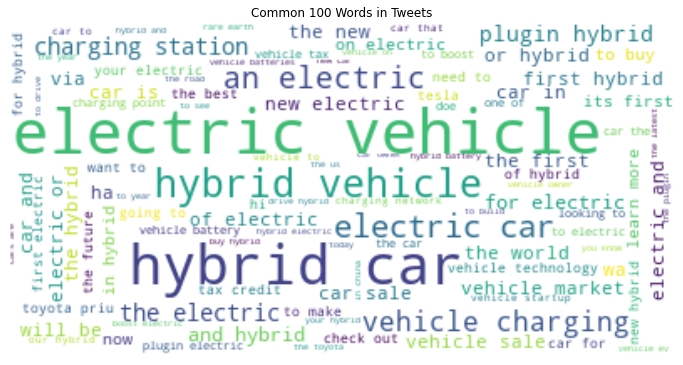

In [175]:
# Join the review.
long_string = ','.join(list(df.tweet.values))

# Import the image of a car to have it as mask
# car_mask = np.array(Image.open("fiat_cloud.jpg"))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

plt.figure(figsize= (12,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Common 100 Words in Tweets")

plt.show()

## stopword

In [3]:
## Read in the scraped data
CWD=os.getcwd()
FOLDER='New Twitter data'

In [4]:
df= pd.read_csv(os.path.join(CWD,FOLDER,'Twitter_Cleaned_Pre.csv'))

In [5]:
df.dropna(subset=['tweet'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100237 entries, 0 to 100251
Data columns (total 5 columns):
Unnamed: 0    100237 non-null int64
tweet         100237 non-null object
label         100237 non-null object
year          100237 non-null int64
original      100237 non-null object
dtypes: int64(2), object(3)
memory usage: 4.6+ MB


In [7]:
df

,Unnamed: 0,tweet,label,year,original
0,0,is a perfect for electric vehicle owners,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,1,exclusive video on gms electric vehicle path p...,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...
2,2,hong kong announcement worlds biggest electri...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...
3,3,exclusive video on gms electric vehicle path p...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
4,4,exclusive video on gms electric vehicle path p...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
...,...,...,...,...,...
100247,100247,projected barrel oil in how are electrichybri...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...
100248,100248,toyotas most affordable hybrid vehicle is also...,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100249,100249,toyotas most affordable hybrid vehicle is also...,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100250,100250,to kick off were looking at all the new model...,Hybrid,2015,"To kick off 2015, we're looking at all the new..."


In [8]:
df= df.drop(['Unnamed: 0'],axis=1)

In [9]:
## stopwords
stop = stopwords.words('english')

stop.extend([
    "ev", "electric", "hybrid", "car", "vehicle", "bike", "cars", "vehicles",
    "scooter", "cycle", "good", "thing", 'fiesta', 'eq', 'iq', 'viva',
    'forfour', 'c3', '108', 'picanto', 'mirage', 'ford', 'ignis', '500', 'mii',
    'zoe', 'mitsubishi', 'c1', 'vauxhall', 'i10', 'aygo', 'smart', 'panda',
    'kia', 'hyundai', 'cabrio', 'splash', 'micra', 'chevrolet', 'citigo',
    'swift', 'clio', 'c-zero', 'renault', 'volkswagen', 'alto', 'pixo',
    'agila', 'corsa', 'celerio', 'nissan', 'spark', 'mia', 'skoda', 'peugeot',
    '107', 'ka', 'toyota', 'golf', 'up', 'yaris', 'fortwo', 'a1', 'polo',
    'citroen', 'coupe', 'mini', 'leaf', 'pulsar', 'adam', 'fiat', 'ion',
    'suzuki', '208', 'abarth', 'audi', 'twingo', 'bmw', 'tesla', 'volvo',
    'nio', 'suv', 'xpeng', 'byd', 'model', 'evs', 'people', 'make', 'big',
    'small', 'talk', 'today', 'yesterday', 'truck', 'uk', 'china', 'india',
    'day', 'company', 'tunnel', 'prius', 'honda', 'tsla', 'love', 'auto',
    'electricvehicle', 'now', 'year', 'world', 'evs', 'drive', 'great', 'good',
    'automotive', 'work', 'buy', 'time', 'year', 'decade', 'hope', 'start',
    'give', 'delhi', 'vw', 'motor', 'good', 'train', 'years', 'decades',
    'make', 'high', 'weeks', 'week', 'driver', 'job', 'build', 'wait',
    'happen', 'bought', 'drived', 'driving', 'norway', 'elon', 'musk',
    'elon-musk', 'plugin', 'plug-in', 'phev','made','grandland','tsla',
    'hybridcar','electriccar','hybridvehicle','bikes','cycles','scooters',
    'new','first','doe','want','looking','going','lol','wa','us','one','porsche',
    'owner','best','europe','london','drive','better','good',
    'porsche,' 'mercede','comfortsport', 'mercedes','mercedes-benz', 'honda','toyota','audi', 'benz','bentley','lexus',
                  'nissan','volvo','drive','nt','like','vehicle','infiniti','good','corvette','come','edmund','lotus','diego','snake',
                 'porsche', 'cayman','bought','year','minute','chicago','car','home', 'work','think','suv','people','edmunds',
                  'cabriolet','lexuss','japan','husband','baby','range', 'rover','cadillac','cadillacs','michelin','texas','second',
                   'awsome','one','now', 'take', 'give','levinson','road','love','sedan','wife','sport','bang','tank',
                   'truck','lemon','imho','pathfinder','infinity','convertible','allroad','conv','bike','ski','grocery','mclass'
                  ,'hardtop','club','hubby','child','zoom','test','etc','brain','ashamed','carmax','alpina','rocketship','great','germany',
                  'autobahn','mercedez','new','toyotas'
])

df['tweet'] = df['tweet'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
#'hybrids','bus','drivers','owners','read'

In [11]:
df.to_csv('try.csv')

In [10]:
df

,tweet,label,year,original
0,perfect owners,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,exclusive video gms path plans highlights,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...
2,hong kong announcement worlds biggest rally su...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...
3,exclusive video gms path plans highlights,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
4,exclusive video gms path plans highlights orig...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
...,...,...,...,...
100247,projected barrel oil electrichybrid makers com...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...
100248,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100249,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100250,kick models technology including mondeo,Hybrid,2015,"To kick off 2015, we're looking at all the new..."


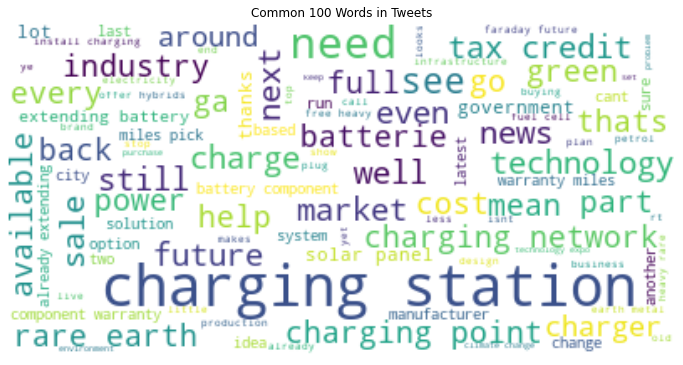

In [41]:
# Join the review.
long_string = ','.join(list(df.tweet.values))

# Import the image of a car to have it as mask
# car_mask = np.array(Image.open("fiat_cloud.jpg"))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

plt.figure(figsize= (12,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Common 100 Words in Tweets")

plt.show()

In [42]:
'way','really','use','look','say','making','getting','learn','youre','thank','find','using','got','know',
'dont','read','get','let','via','many','right','used','check',
'hybrid','said','much','electrichybrid','blog','post','doesnt','drivers','thanks','looks','two'

('hybrid',
 'said',
 'much',
 'electrichybrid',
 'blog',
 'post',
 'doesnt',
 'drivers',
 'thanks',
 'looks',
 'two')

In [15]:
df['tweet'].isnull().count() == len(df['tweet'])

True

In [30]:
df.reset_index(inplace=True)

In [17]:
df

,index,tweet,label,year,original
0,0,perfect,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,1,exclusive video gms path plans highlights,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...
2,2,hong kong announcement worlds biggest rally su...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...
3,3,exclusive video gms path plans highlights,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
4,4,exclusive video gms path plans highlights orig...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
...,...,...,...,...,...
100232,100247,projected barrel oil electrichybrid makers com...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...
100233,100248,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100234,100249,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100235,100250,kick models technology including mondeo,Hybrid,2015,"To kick off 2015, we're looking at all the new..."


In [31]:
df= df.drop(['index'],axis=1)

In [32]:
df

,tweet,label,year,original
0,perfect owners,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,exclusive video gms path plans highlights,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...
2,hong kong announcement worlds biggest rally su...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...
3,exclusive video gms path plans highlights,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
4,exclusive video gms path plans highlights orig...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
...,...,...,...,...
100232,projected barrel oil electrichybrid makers com...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...
100233,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100234,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
100235,kick models technology including mondeo,Hybrid,2015,"To kick off 2015, we're looking at all the new..."


In [25]:
check=list(set(df.year.values.tolist()))

In [26]:
check

[2016, 2017, 2018, 2019, 2015]

In [20]:
############pls save

df.to_csv(os.path.join(CWD,FOLDER,'Twitter_Stop.csv'))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100237 entries, 0 to 100236
Data columns (total 4 columns):
tweet       100237 non-null object
label       100237 non-null object
year        100237 non-null int64
original    100237 non-null object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


# Phrased

In [ ]:
# in 'twitter Topic modeling'

In [ ]:
## Read in the scraped data
CWD=os.getcwd()
FOLDER='New Twitter data'
FILE1='Electric_data.csv'
FILE2='Hybrid_data.csv'

In [35]:
df2= pd.read_csv(os.path.join(CWD,FOLDER,'save','Twitter_Stop.csv'))

In [40]:
df2.dropna(subset=['tweet'],inplace=True)

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99551 entries, 0 to 100238
Data columns (total 4 columns):
Unnamed: 0    99551 non-null int64
tweet         99551 non-null object
label         99551 non-null object
year          99551 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


In [50]:
df2= pd.read_csv(os.path.join(CWD,FOLDER,'save','Twitter_Phrases.csv'))

In [51]:
df2

,Unnamed: 0,tweet,label,year,docs_phrases
0,0,perfect owners pictwittercomvxcifgvwzi,Electric,2015,"['perfect', 'owner']"
1,1,exclusive video gms path plans highlights,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ..."
2,2,hong kong announcement worlds biggest rally su...,Electric,2015,"['hong', 'kong', 'announcement', 'world_big', ..."
3,3,exclusive video gms path plans highlights,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ..."
4,4,exclusive video gms path plans highlights orig...,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ..."
...,...,...,...,...,...
100247,100247,projected barrel oil electrichybrid makers com...,Hybrid,2015,"['project', 'barrel', 'oil', 'maker', 'communi..."
100248,100248,toyotas affordable also fuel efficient c epaes...,Hybrid,2015,"['toyotas', 'affordable', 'fuel', 'efficient',..."
100249,100249,toyotas affordable also fuel efficient c epaes...,Hybrid,2015,"['toyotas', 'affordable', 'fuel', 'efficient',..."
100250,100250,kick models technology including mondeo,Hybrid,2015,"['kick', 'model', 'technology', 'include', 'mo..."


In [52]:
df2['original']=df['original']

In [53]:
df2

,Unnamed: 0,tweet,label,year,docs_phrases,original
0,0,perfect owners pictwittercomvxcifgvwzi,Electric,2015,"['perfect', 'owner']",#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,1,exclusive video gms path plans highlights,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...",#solar Exclusive Video On GM’s Electric Vehicl...
2,2,hong kong announcement worlds biggest rally su...,Electric,2015,"['hong', 'kong', 'announcement', 'world_big', ...",@harbourtimes Hong Kong announcement - 2016 wo...
3,3,exclusive video gms path plans highlights,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...","Exclusive Video On GM’s Electric Vehicle Path,..."
4,4,exclusive video gms path plans highlights orig...,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...","Exclusive Video On GM’s Electric Vehicle Path,..."
...,...,...,...,...,...,...
100247,100247,projected barrel oil electrichybrid makers com...,Hybrid,2015,"['project', 'barrel', 'oil', 'maker', 'communi...",Projected $40/Barrel Oil in 2015. How are elec...
100248,100248,toyotas affordable also fuel efficient c epaes...,Hybrid,2015,"['toyotas', 'affordable', 'fuel', 'efficient',...",Toyota's most affordable hybrid vehicle is als...
100249,100249,toyotas affordable also fuel efficient c epaes...,Hybrid,2015,"['toyotas', 'affordable', 'fuel', 'efficient',...",Toyota's most affordable hybrid vehicle is als...
100250,100250,kick models technology including mondeo,Hybrid,2015,"['kick', 'model', 'technology', 'include', 'mo...","To kick off 2015, we're looking at all the new..."


In [54]:
df2[5:20]

,Unnamed: 0,tweet,label,year,docs_phrases,original
5,5,exclusive video gms path plans highlights clea...,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...","Exclusive Video On GM's Electric Vehicle Path,..."
6,6,post exclusive video gms path plans highlights,Electric,2015,"['post', 'exclusive', 'video', 'gms', 'path', ...",New post: Exclusive Video On GM’s Electric Veh...
7,7,hong kong announcement worlds biggest rally su...,Electric,2015,"['hong', 'kong', 'announcement', 'world_big', ...",@vickykwk Hong Kong announcement - 2016 world’...
8,8,via exclusive video gms path plans highlights,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...",via @cleantechnica Exclusive Video On GM’s Ele...
9,9,hong kong announcement worlds biggest rally su...,Electric,2015,"['hong', 'kong', 'announcement', 'world_big', ...",@hsingh_hk Hong Kong announcement - 2016 world...
10,10,exclusive video gms path plans highlights,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...","Exclusive Video On GM’s Electric Vehicle Path,..."
11,11,market poised expand,Electric,2015,"['market', 'poise', 'expand']",Electric vehicle market poised to expand at h...
12,12,bellevue university activates charging station,Electric,2015,"['bellevue', 'university', 'activate', 'charge...",Bellevue University Activates New Electric Veh...
13,13,exclusive video gms path plans highlights,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...",#solar Exclusive Video On GM’s Electric Vehicl...
14,14,exclusive video gms path plans highlights pict...,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...","Exclusive Video On GM’s Electric Vehicle Path,..."


In [55]:
'Exclusive Video On GM’s'in df2['original'] [14]

True

In [ ]:
for i in range(len(df2)):
    if 'Exclusive Video On GM’s Electric Vehicle Path'in df2['original'] [i] is True:
        df2[]

In [57]:
a=pd.DataFrame({'a':[1,2,3]})

In [61]:
df2['ads']=['Exclusive Video On GM’s'in df2['original'] [i] for i in range(len(df2))]

In [87]:
df2=df2.drop(['Unnamed: 0','ads'],axis=1)

In [89]:
df2.to_csv('with original.csv')

In [65]:
df3=df2.loc[df2['ads']==False]

In [68]:
df3

,index,Unnamed: 0,tweet,label,year,docs_phrases,original,ads
0,0,0,perfect owners pictwittercomvxcifgvwzi,Electric,2015,"['perfect', 'owner']",#MyFord #Mobile Is a #SmartWatch #App Perfect ...,False
1,2,2,hong kong announcement worlds biggest rally su...,Electric,2015,"['hong', 'kong', 'announcement', 'world_big', ...",@harbourtimes Hong Kong announcement - 2016 wo...,False
2,5,5,exclusive video gms path plans highlights clea...,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...","Exclusive Video On GM's Electric Vehicle Path,...",False
3,7,7,hong kong announcement worlds biggest rally su...,Electric,2015,"['hong', 'kong', 'announcement', 'world_big', ...",@vickykwk Hong Kong announcement - 2016 world’...,False
4,9,9,hong kong announcement worlds biggest rally su...,Electric,2015,"['hong', 'kong', 'announcement', 'world_big', ...",@hsingh_hk Hong Kong announcement - 2016 world...,False
...,...,...,...,...,...,...,...,...
100228,100247,100247,projected barrel oil electrichybrid makers com...,Hybrid,2015,"['project', 'barrel', 'oil', 'maker', 'communi...",Projected $40/Barrel Oil in 2015. How are elec...,False
100229,100248,100248,toyotas affordable also fuel efficient c epaes...,Hybrid,2015,"['toyotas', 'affordable', 'fuel', 'efficient',...",Toyota's most affordable hybrid vehicle is als...,False
100230,100249,100249,toyotas affordable also fuel efficient c epaes...,Hybrid,2015,"['toyotas', 'affordable', 'fuel', 'efficient',...",Toyota's most affordable hybrid vehicle is als...,False
100231,100250,100250,kick models technology including mondeo,Hybrid,2015,"['kick', 'model', 'technology', 'include', 'mo...","To kick off 2015, we're looking at all the new...",False


In [75]:
df3['original'] [3]

'@vickykwk Hong Kong announcement - 2016 world’s biggest electric vehicle rally for sustainability - more worldreachpr@gmail.com'

In [76]:
df3.reset_index(inplace=True)

In [77]:
df3['ads']=['Hong Kong announcement'in df3['original'] [i] for i in range(len(df3))]

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
df3

,level_0,index,Unnamed: 0,tweet,label,year,docs_phrases,original,ads
0,0,0,0,perfect owners pictwittercomvxcifgvwzi,Electric,2015,"['perfect', 'owner']",#MyFord #Mobile Is a #SmartWatch #App Perfect ...,False
1,1,2,2,hong kong announcement worlds biggest rally su...,Electric,2015,"['hong', 'kong', 'announcement', 'world_big', ...",@harbourtimes Hong Kong announcement - 2016 wo...,True
2,2,5,5,exclusive video gms path plans highlights clea...,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...","Exclusive Video On GM's Electric Vehicle Path,...",False
3,3,7,7,hong kong announcement worlds biggest rally su...,Electric,2015,"['hong', 'kong', 'announcement', 'world_big', ...",@vickykwk Hong Kong announcement - 2016 world’...,True
4,4,9,9,hong kong announcement worlds biggest rally su...,Electric,2015,"['hong', 'kong', 'announcement', 'world_big', ...",@hsingh_hk Hong Kong announcement - 2016 world...,True
...,...,...,...,...,...,...,...,...,...
100226,100226,100245,100245,check services training center wisconsin,Hybrid,2015,"['check', 'services', 'training', 'center', 'w...",Check out our new Hybrid Vehicle Services Trai...,False
100227,100227,100246,100246,check experts reel reel,Hybrid,2015,"['check', 'expert', 'reel', 'reel']",Check this out? Your Hybrid Vehicle Experts - ...,False
100228,100228,100247,100247,projected barrel oil electrichybrid makers com...,Hybrid,2015,"['project', 'barrel', 'oil', 'maker', 'communi...",Projected $40/Barrel Oil in 2015. How are elec...,False
100229,100231,100250,100250,kick models technology including mondeo,Hybrid,2015,"['kick', 'model', 'technology', 'include', 'mo...","To kick off 2015, we're looking at all the new...",False


In [79]:
df3=df3.loc[df3['ads']==False]

In [80]:
df3

,level_0,index,Unnamed: 0,tweet,label,year,docs_phrases,original,ads
0,0,0,0,perfect owners pictwittercomvxcifgvwzi,Electric,2015,"['perfect', 'owner']",#MyFord #Mobile Is a #SmartWatch #App Perfect ...,False
2,2,5,5,exclusive video gms path plans highlights clea...,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...","Exclusive Video On GM's Electric Vehicle Path,...",False
5,5,11,11,market poised expand,Electric,2015,"['market', 'poise', 'expand']",Electric vehicle market poised to expand at h...,False
6,6,12,12,bellevue university activates charging station,Electric,2015,"['bellevue', 'university', 'activate', 'charge...",Bellevue University Activates New Electric Veh...,False
7,7,18,18,perfect owners pictwittercomxkmjplsv,Electric,2015,"['perfect', 'owner']",#MyFord #Mobile Is a #SmartWatch #App Perfect ...,False
...,...,...,...,...,...,...,...,...,...
100226,100226,100245,100245,check services training center wisconsin,Hybrid,2015,"['check', 'services', 'training', 'center', 'w...",Check out our new Hybrid Vehicle Services Trai...,False
100227,100227,100246,100246,check experts reel reel,Hybrid,2015,"['check', 'expert', 'reel', 'reel']",Check this out? Your Hybrid Vehicle Experts - ...,False
100228,100228,100247,100247,projected barrel oil electrichybrid makers com...,Hybrid,2015,"['project', 'barrel', 'oil', 'maker', 'communi...",Projected $40/Barrel Oil in 2015. How are elec...,False
100229,100231,100250,100250,kick models technology including mondeo,Hybrid,2015,"['kick', 'model', 'technology', 'include', 'mo...","To kick off 2015, we're looking at all the new...",False


In [85]:
df3.drop_duplicates(subset=['docs_phrases'],inplace=True)

,level_0,index,Unnamed: 0,tweet,label,year,docs_phrases,original,ads
0,0,0,0,perfect owners pictwittercomvxcifgvwzi,Electric,2015,"['perfect', 'owner']",#MyFord #Mobile Is a #SmartWatch #App Perfect ...,False
2,2,5,5,exclusive video gms path plans highlights clea...,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...","Exclusive Video On GM's Electric Vehicle Path,...",False
5,5,11,11,market poised expand,Electric,2015,"['market', 'poise', 'expand']",Electric vehicle market poised to expand at h...,False
6,6,12,12,bellevue university activates charging station,Electric,2015,"['bellevue', 'university', 'activate', 'charge...",Bellevue University Activates New Electric Veh...,False
8,8,27,27,dl subaru dl conversion working fully pictwitt...,Electric,2015,"['dl', 'subaru', 'dl', 'conversion', 'work', '...",DL (1988) #DL http://bit.ly/1JgrkDS 1988 Sub...,False
...,...,...,...,...,...,...,...,...,...
100226,100226,100245,100245,check services training center wisconsin,Hybrid,2015,"['check', 'services', 'training', 'center', 'w...",Check out our new Hybrid Vehicle Services Trai...,False
100227,100227,100246,100246,check experts reel reel,Hybrid,2015,"['check', 'expert', 'reel', 'reel']",Check this out? Your Hybrid Vehicle Experts - ...,False
100228,100228,100247,100247,projected barrel oil electrichybrid makers com...,Hybrid,2015,"['project', 'barrel', 'oil', 'maker', 'communi...",Projected $40/Barrel Oil in 2015. How are elec...,False
100229,100231,100250,100250,kick models technology including mondeo,Hybrid,2015,"['kick', 'model', 'technology', 'include', 'mo...","To kick off 2015, we're looking at all the new...",False


In [90]:
df3=df3.drop(['Unnamed: 0','ads','index','level_0'],axis=1)

In [92]:
df3.drop_duplicates(subset=['docs_phrases'],inplace=True)

In [94]:
df3.reset_index(inplace=True)

In [95]:
df3

,index,tweet,label,year,docs_phrases,original
0,0,perfect owners pictwittercomvxcifgvwzi,Electric,2015,"['perfect', 'owner']",#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,2,exclusive video gms path plans highlights clea...,Electric,2015,"['exclusive', 'video', 'gms', 'path', 'plan', ...","Exclusive Video On GM's Electric Vehicle Path,..."
2,5,market poised expand,Electric,2015,"['market', 'poise', 'expand']",Electric vehicle market poised to expand at h...
3,6,bellevue university activates charging station,Electric,2015,"['bellevue', 'university', 'activate', 'charge...",Bellevue University Activates New Electric Veh...
4,8,dl subaru dl conversion working fully pictwitt...,Electric,2015,"['dl', 'subaru', 'dl', 'conversion', 'work', '...",DL (1988) #DL http://bit.ly/1JgrkDS 1988 Sub...
...,...,...,...,...,...,...
68182,100226,check services training center wisconsin,Hybrid,2015,"['check', 'services', 'training', 'center', 'w...",Check out our new Hybrid Vehicle Services Trai...
68183,100227,check experts reel reel,Hybrid,2015,"['check', 'expert', 'reel', 'reel']",Check this out? Your Hybrid Vehicle Experts - ...
68184,100228,projected barrel oil electrichybrid makers com...,Hybrid,2015,"['project', 'barrel', 'oil', 'maker', 'communi...",Projected $40/Barrel Oil in 2015. How are elec...
68185,100229,kick models technology including mondeo,Hybrid,2015,"['kick', 'model', 'technology', 'include', 'mo...","To kick off 2015, we're looking at all the new..."


In [96]:
df3=df3.drop(['index'],axis=1)

In [100]:
df3[3244:3692]

,tweet,label,year,docs_phrases,original
3244,collective learning hotspots charging stations...,Electric,2015,"['collective', 'learning', 'hotspot', 'charge'...",Collective learning hotspots: Electric Vehicle...
3245,daimler reusing batteries store renewable ener...,Electric,2015,"['daimler_reuse', 'battery', 'store_renewable_...",Daimler is reusing electric vehicle batteries ...
3246,news daimler reusing batteries store renewable...,Electric,2015,"['news', 'daimler_reuse', 'battery', 'store_re...",IT news: Daimler is reusing electric vehicle b...
3247,hardest working ranger quieter machine never n...,Electric,2015,"['hard', 'work', 'ranger', 'quiet', 'machine',...","Hardest working Electric Vehicle, RANGER EV is..."
3248,daimler reusing batteries store renewable ener...,Electric,2015,"['daimler_reuse', 'battery', 'store_renewable_...",Daimler is reusing electric vehicle batteries ...
...,...,...,...,...,...
3687,secret story behind latest wouldbe challenger ...,Electric,2015,"['secret', 'story', 'late', 'wouldbe', 'challe...",The Secret Story Behind The Latest Would-Be Te...
3688,products services sun country highway,Electric,2015,"['product', 'services', 'sun', 'country', 'hig...",Electric Vehicle (EV) Products and Services | ...
3689,common myths versus reality read,Electric,2015,"['common', 'myth', 'versus', 'reality', 'read']","Common #Tesla myths versus the reality, read t..."
3690,urban deliveries measured europallet theyre xm...,Electric,2015,"['urban', 'delivery', 'measure', 'xmm', 'towin...",1. Re Urban deliveries: I just measured a Euro...


In [101]:
df3.to_csv('remove ads.csv')

In [104]:
# remove punctuation
df3['docs_phrases'] = df3['docs_phrases'].str.replace('[','')
df3['docs_phrases'] = df3['docs_phrases'].str.replace(']','')

In [105]:
df3

,tweet,label,year,docs_phrases,original
0,perfect owners pictwittercomvxcifgvwzi,Electric,2015,"'perfect', 'owner'",#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,exclusive video gms path plans highlights clea...,Electric,2015,"'exclusive', 'video', 'gms', 'path', 'plan', '...","Exclusive Video On GM's Electric Vehicle Path,..."
2,market poised expand,Electric,2015,"'market', 'poise', 'expand'",Electric vehicle market poised to expand at h...
3,bellevue university activates charging station,Electric,2015,"'bellevue', 'university', 'activate', 'charge'...",Bellevue University Activates New Electric Veh...
4,dl subaru dl conversion working fully pictwitt...,Electric,2015,"'dl', 'subaru', 'dl', 'conversion', 'work', 'f...",DL (1988) #DL http://bit.ly/1JgrkDS 1988 Sub...
...,...,...,...,...,...
68182,check services training center wisconsin,Hybrid,2015,"'check', 'services', 'training', 'center', 'wi...",Check out our new Hybrid Vehicle Services Trai...
68183,check experts reel reel,Hybrid,2015,"'check', 'expert', 'reel', 'reel'",Check this out? Your Hybrid Vehicle Experts - ...
68184,projected barrel oil electrichybrid makers com...,Hybrid,2015,"'project', 'barrel', 'oil', 'maker', 'communic...",Projected $40/Barrel Oil in 2015. How are elec...
68185,kick models technology including mondeo,Hybrid,2015,"'kick', 'model', 'technology', 'include', 'mon...","To kick off 2015, we're looking at all the new..."
